# Продвинутое машинное обучение: ДЗ 1

## Часть I: О теореме Байеса

1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
    Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


Введем следующие события:
- событие A - у человека редкая группа крови;
- событие B - подсудимый виновен.
Тогда прокурор оценил следующие вероятности:

$$
P(A|\overline{B}) = 0.99 \\
P(B) = 0.1
$$
Должен был оценить следующую вероятность
$$
P(B|A) = \frac{P(B)P(A|B}{P(A)}
$$

2. Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?


Адвокат оценил 
$$
P(вероятность\,редкой\,группы\,крови\,у\,случайного\,человека) = 0.01
$$

Рассуждение верное, но при этом адвокат не учитывает, что человек уже подозреваемый.

На самом деле адвокат должен был оценить:
$$
P(\overline{B}|A) = \frac{P(\overline{B})P(A|\overline{B})}{P(A)}
$$

In [23]:
import datetime

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

%matplotlib inline

## Часть II: О линейной регрессии

In [4]:
!wget https://covid.ourworldindata.org/data/owid-covid-data.csv

--2021-02-24 21:08:44--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Распознаётся covid.ourworldindata.org (covid.ourworldindata.org)… 104.21.233.137, 104.21.233.138
Подключение к covid.ourworldindata.org (covid.ourworldindata.org)|104.21.233.137|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: нет данных [text/csv]
Сохранение в: «owid-covid-data.csv»

owid-covid-data.csv     [           <=>      ]  17,20M  7,51MB/s    за 2,3s    

2021-02-24 21:08:46 (7,51 MB/s) - «owid-covid-data.csv» сохранён [18040380]



In [8]:
df = pd.read_csv('owid-covid-data.csv')

In [12]:
df = df[df.location=='Russia']
df.date = pd.to_datetime(df.date)
df = df[df.date >= datetime.datetime(2020, 3, 3)]
df.loc[df.new_cases==0, 'new_cases'] = 1
df.index = df.date
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-03-03,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
2020-03-04,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
2020-03-05,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
2020-03-06,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
2020-03-07,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


In [14]:
train_size = 50
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [15]:
print(f'Train size {train.shape[0]} \nTest size {test.shape[0]}')

Train size 50 
Test size 308


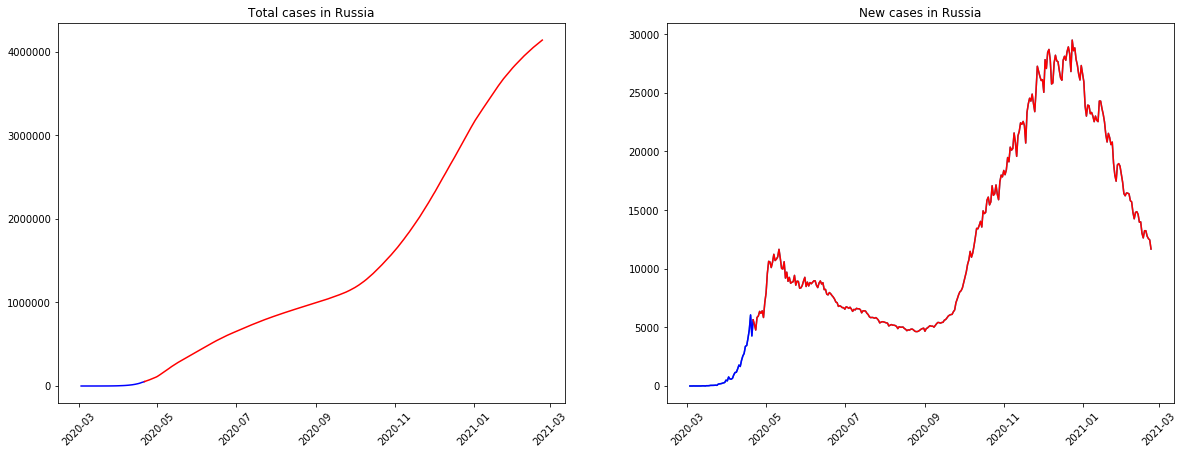

In [21]:
plt.subplots(1, 2, figsize=(20, 7))

plt.subplot(121)
plt.plot(df.iloc[:train_size].total_cases, color='blue')
plt.plot(df.iloc[train_size - 1:].total_cases, color='red')
plt.title('Total cases in Russia')
plt.xticks(rotation=45)

plt.subplot(122)
plt.plot(df.new_cases)
plt.plot(df.iloc[:train_size].new_cases, color='blue')
plt.plot(df.iloc[train_size - 1:].new_cases, color='red')
plt.title('New cases in Russia')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Первые 50 дней с 1 по 50 - train
x_train = np.arange(1, train_size + 1)
# y1 - обозначим total cases, y2 - new cases

# Обучаем модели для log(y) = w_0 + w_1*x
log_total_train = np.log(train.total_cases.values)
totalcases_exp_model = LinearRegression(fit_intercept=True).fit(x_train[:, np.newaxis], log_total_train)

log_new_train = np.log(train.new_cases.values)
newcases_exp_model = LinearRegression(fit_intercept=True).fit(x_train[:, np.newaxis], log_new_train)

In [27]:
# Предсказания моделей:
x_test = np.arange(x_train[-1], x_train[-1] + len(test)) + 1

total_train_predict = totalcases_exp_model.predict(x_train[:, np.newaxis])
total_test_predict = totalcases_exp_model.predict(x_test[:, np.newaxis])

new_train_predict = newcases_exp_model.predict(x_train[:, np.newaxis])
new_test_predict = newcases_exp_model.predict(x_test[:, np.newaxis])

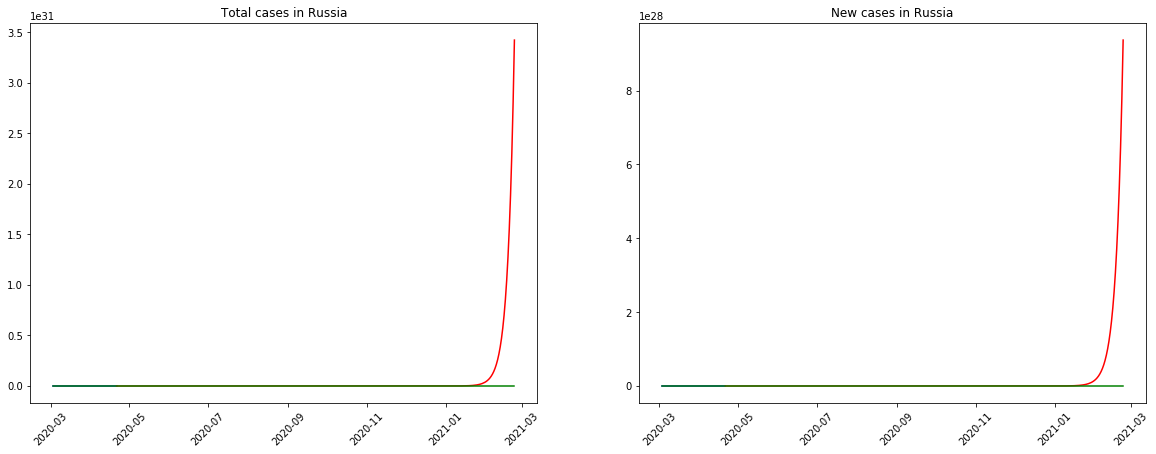

In [31]:
plt.subplots(1, 2, figsize=(20, 7))

plt.subplot(121)
plt.plot(df.iloc[:train_size].index, np.exp(total_train_predict), color='blue')
plt.plot(df.iloc[train_size - 1:].index, np.exp(np.hstack([[total_train_predict[-1]], total_test_predict])), color='red')
plt.plot(df.total_cases, color='green')
plt.title('Total cases in Russia')
plt.xticks(rotation=45)

plt.subplot(122)
plt.plot(df.iloc[:train_size].index, np.exp(new_train_predict), color='blue')
plt.plot(df.iloc[train_size - 1:].index, np.exp(np.hstack([[new_train_predict[-1]], new_test_predict])), color='red')
plt.plot(df.new_cases, color='green')
plt.title('New cases in Russia')
plt.xticks(rotation=45)

plt.show()

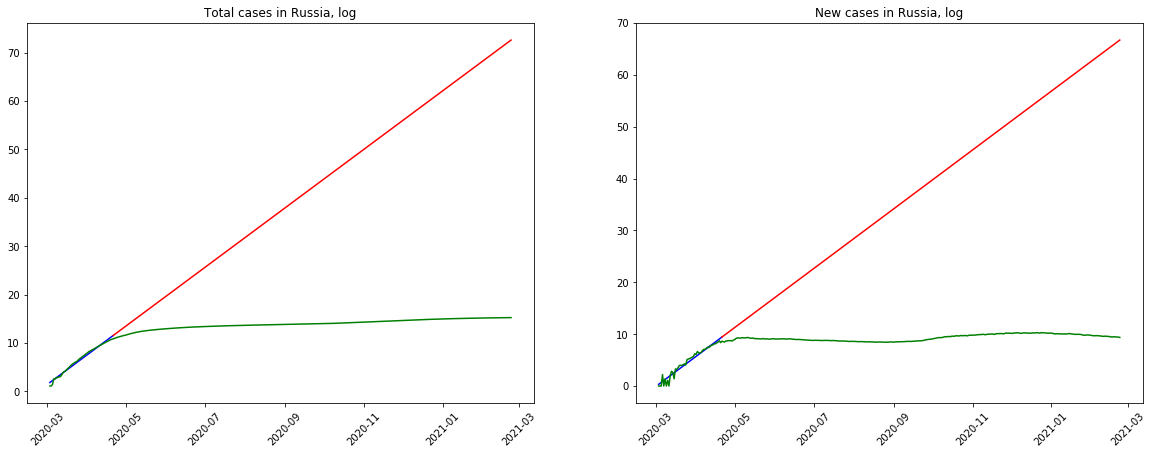

In [33]:
plt.subplots(1, 2, figsize=(20, 7))

plt.subplot(121)
plt.plot(df.iloc[:train_size].index, total_train_predict, color='blue')
plt.plot(df.iloc[train_size - 1:].index, np.hstack([[total_train_predict[-1]], total_test_predict]), color='red')
plt.plot(np.log(df.total_cases), color='green')
plt.title('Total cases in Russia, log')
plt.xticks(rotation=45)

plt.subplot(122)
plt.plot(df.iloc[:train_size].index, new_train_predict, color='blue')
plt.plot(df.iloc[train_size - 1:].index, np.hstack([[new_train_predict[-1]], new_test_predict]), color='red')
plt.plot(np.log(df.new_cases), color='green')
plt.title('New cases in Russia, log')
plt.xticks(rotation=45)

plt.show()

b) Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [34]:
def bayesian_update(mu_0, sigma_0, X, y, noise):
    sigma_n = np.linalg.inv(np.linalg.inv(sigma_0) + noise * np.matmul(np.transpose(X), X))
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma_0), np.transpose(mu_0)) + noise * np.matmul(np.transpose(X), np.array(y)))
    return mu_n, sigma_n

def aposterior(x, y, noise):
    x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
    dim = x.shape[1]
    mu_0 = np.zeros(dim)
    sigma_0 = 10 * np.eye(dim)
    
    noise_new = noise
    noise_prev = noise_new

    while True:
        mu_n, sigma_n = bayesian_update(mu_0, sigma_0, x, y, noise_new)
        predictions = np.matmul(x, mu_n)
        noise_new = 1 / np.var(y - predictions)

        if abs(noise_new - noise_prev) < 1.e-8:
            break
        else:
            noise_prev = noise_new

    return mu_n, sigma_n

In [37]:
noise = 1 / np.var(log_total_train - totalcases_exp_model.predict(x_train[:, np.newaxis]))
new_mu, new_sigma = aposterior(x_train[:, np.newaxis], log_total_train, noise)

In [38]:
new_mu, new_sigma

(array([1.62082406, 0.19833904]),
 array([[ 1.00347484e-02, -2.98061748e-04],
        [-2.98061748e-04,  1.16915441e-05]]))

c) Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

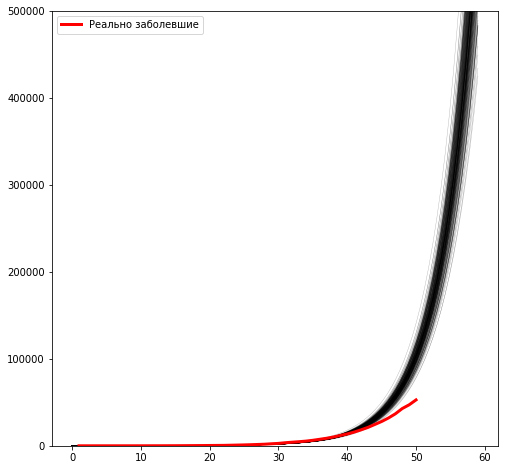

In [42]:
ws = np.random.multivariate_normal(new_mu, new_sigma, 200)
xs = np.linspace(0, 59, 100)
fig = plt.figure(figsize=(8, 8))
for w in ws:
    plt.plot(xs, np.exp(w[0] + w[1]*xs), 'k-', linewidth=.4, alpha=.3)
    plt.ylim((0, 500000))
plt.plot(x_train, train.total_cases, 'red', linewidth=3, label = 'Реально заболевшие')
plt.legend();

3. Сигмоида